# Дифракция света на ультрозвуковых волнах в жидкости

In [184]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress
import pandas as pd

### Эксперимент 1 - определение скорости ультразвука по дифракционной картине

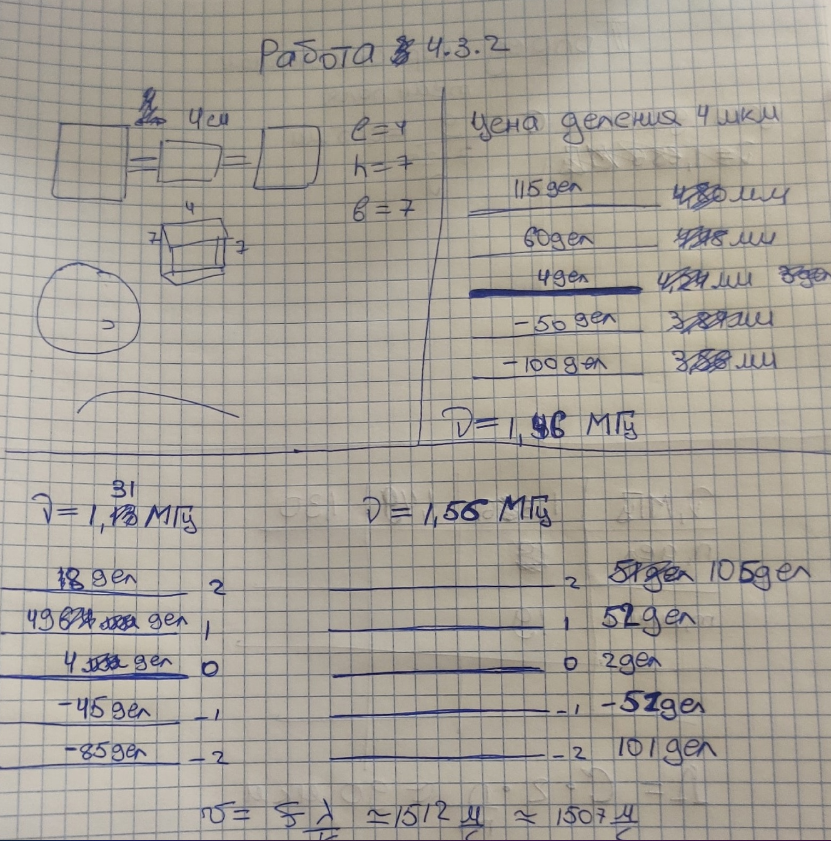

In [185]:
def plotXbyM(freq: float, x: np.ndarray, m: np.ndarray):
    x *= 4 #перевод из делений в микрометры
    xAx = np.linspace(-3,3,4000)
    MNK = linregress(m,x)
    fig, ax = plt.subplots(figsize = (12,5),dpi = 1000)
    plt.errorbar(x = m,
                 y = x,
                 xerr = [0 for _ in m],
                 yerr = [20 for _ in x],
                 fmt = '_',
                 label = 'Экспериментальные данные')
    plt.plot(xAx,
             MNK.slope*xAx+MNK.intercept,
             label = r"Линейная интерполяция, $\alpha = {} \pm {}$".format(round(MNK.slope),round(MNK.stderr/1)*1),
             color = 'pink')
    # plt.plot(xAx,
    #          (MNK.slope+MNK.stderr)*xAx+MNK.intercept,
    #          '-.',
    #          label = r"Ошибка линейной интерполяции",
    #          color = 'red',
    #          linewidth = 0.2
    #          )
    # plt.plot(xAx,
    #          (MNK.slope - MNK.stderr)*xAx+MNK.intercept,
    #          '-.',
    #          color = 'red',
    #          linewidth = 0.2
    #          )
    plt.xlabel("Порядок максимума $m$")
    plt.ylabel(r"Координата максимума $x_{m} \ мкм$")
    plt.title(r"Зависимость $x(m)$ при частоте: $\nu = {} \ мГц$".format(freq))
    plt.grid()
    plt.xticks(m)
    plt.xlim((min(m) - 0.25,max(m) + 0.25))
    plt.ylim((-600,600))
    plt.yticks(np.arange(-600,600,100))
    plt.legend()
    plt.show()
    return MNK

Для определения длины волны:
$$
l_m=m f \frac{\lambda}{\Lambda}
$$
Значит, 

$$
\Lambda = m f \frac{\lambda}{l_m} = \frac{f \lambda}{\alpha}
$$

Где 
- $f = 30 \ см$ - фокусное расстояние объектива
- $\lambda_{кр} = 6400 \pm 200 \ \dot{A}$

In [186]:
def countLambda(MNK) -> tuple:
    f = 30*np.power(0.1,2)
    lambdaRed = 6400*np.power(0.1,10)
    lambdaRed_Error = 200*np.power(0.1,10)
    alpha = MNK.slope*np.power(0.1,6)
    alphaError = MNK.stderr*np.power(0.1,6)
    result = f*lambdaRed/alpha
    resultErr = np.sqrt(np.power(alphaError*result/alpha,2) + np.power(lambdaRed_Error*result/lambdaRed,2))
    return result,resultErr

##### Эксперимент 1($\nu = 1.46 \ мГц$)

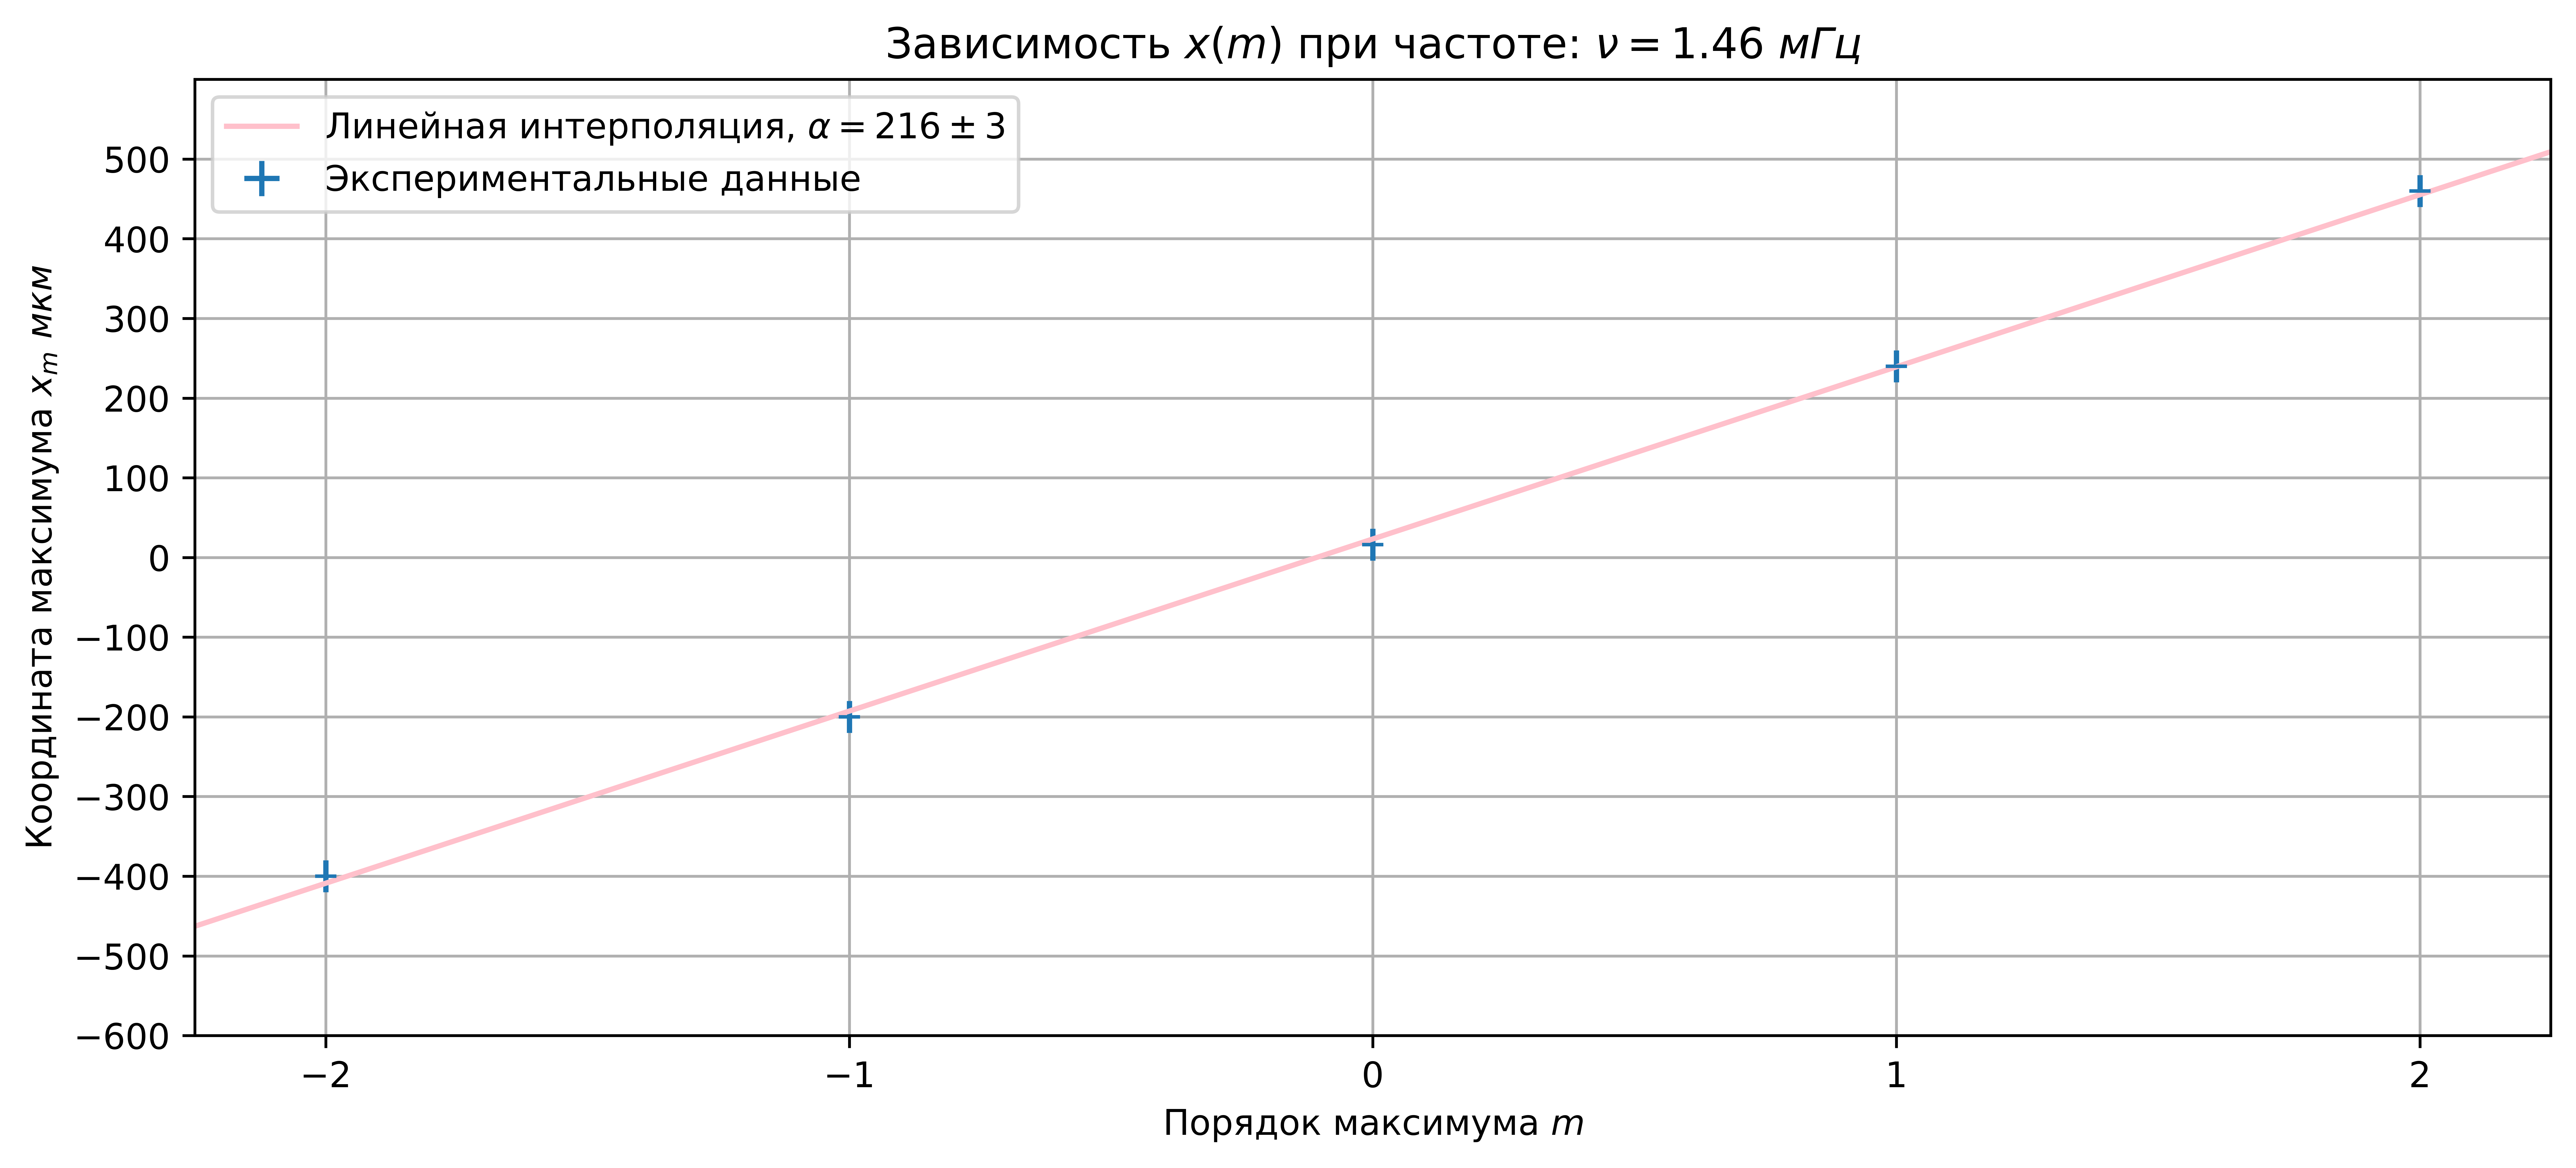

Длина звуковой волны = 0.0008888888888888891 +/- 2.978615681336776e-05
Скорость звука = 1297.777777777778 +/- 43.487788947516925


In [187]:
freq = 1.46
x = np.array([-100,-50,4,60,115])
m = np.array([-2,-1,0,1,2])
Lambda = countLambda(plotXbyM(freq,x,m))
speed = Lambda[0]*freq*np.power(10,6)
speedErr = Lambda[1]*freq*np.power(10,6)
print("Длина звуковой волны = {} +/- {}".format(*Lambda))
print("Скорость звука = {} +/- {}".format(speed,speedErr))

##### Эксперимент 2

In [188]:
freq = 1.56
x = np.array([-101,-51,2,52,100])
m = np.array([-2,-1,0,1,2])
Lambda = countLambda(plotXbyM(freq,x,m))
speed = Lambda[0]*freq*np.power(10,6)
speedErr = Lambda[1]*freq*np.power(10,6)
print("Длина звуковой волны = {} +/- {}".format(Lambda[0]*1000,Lambda[1]*1000))

print("Скорость звука = {} +/- {}".format(speed,speedErr))

SyntaxError: invalid syntax (2021439230.py, line 6)

##### Эксперимент 3

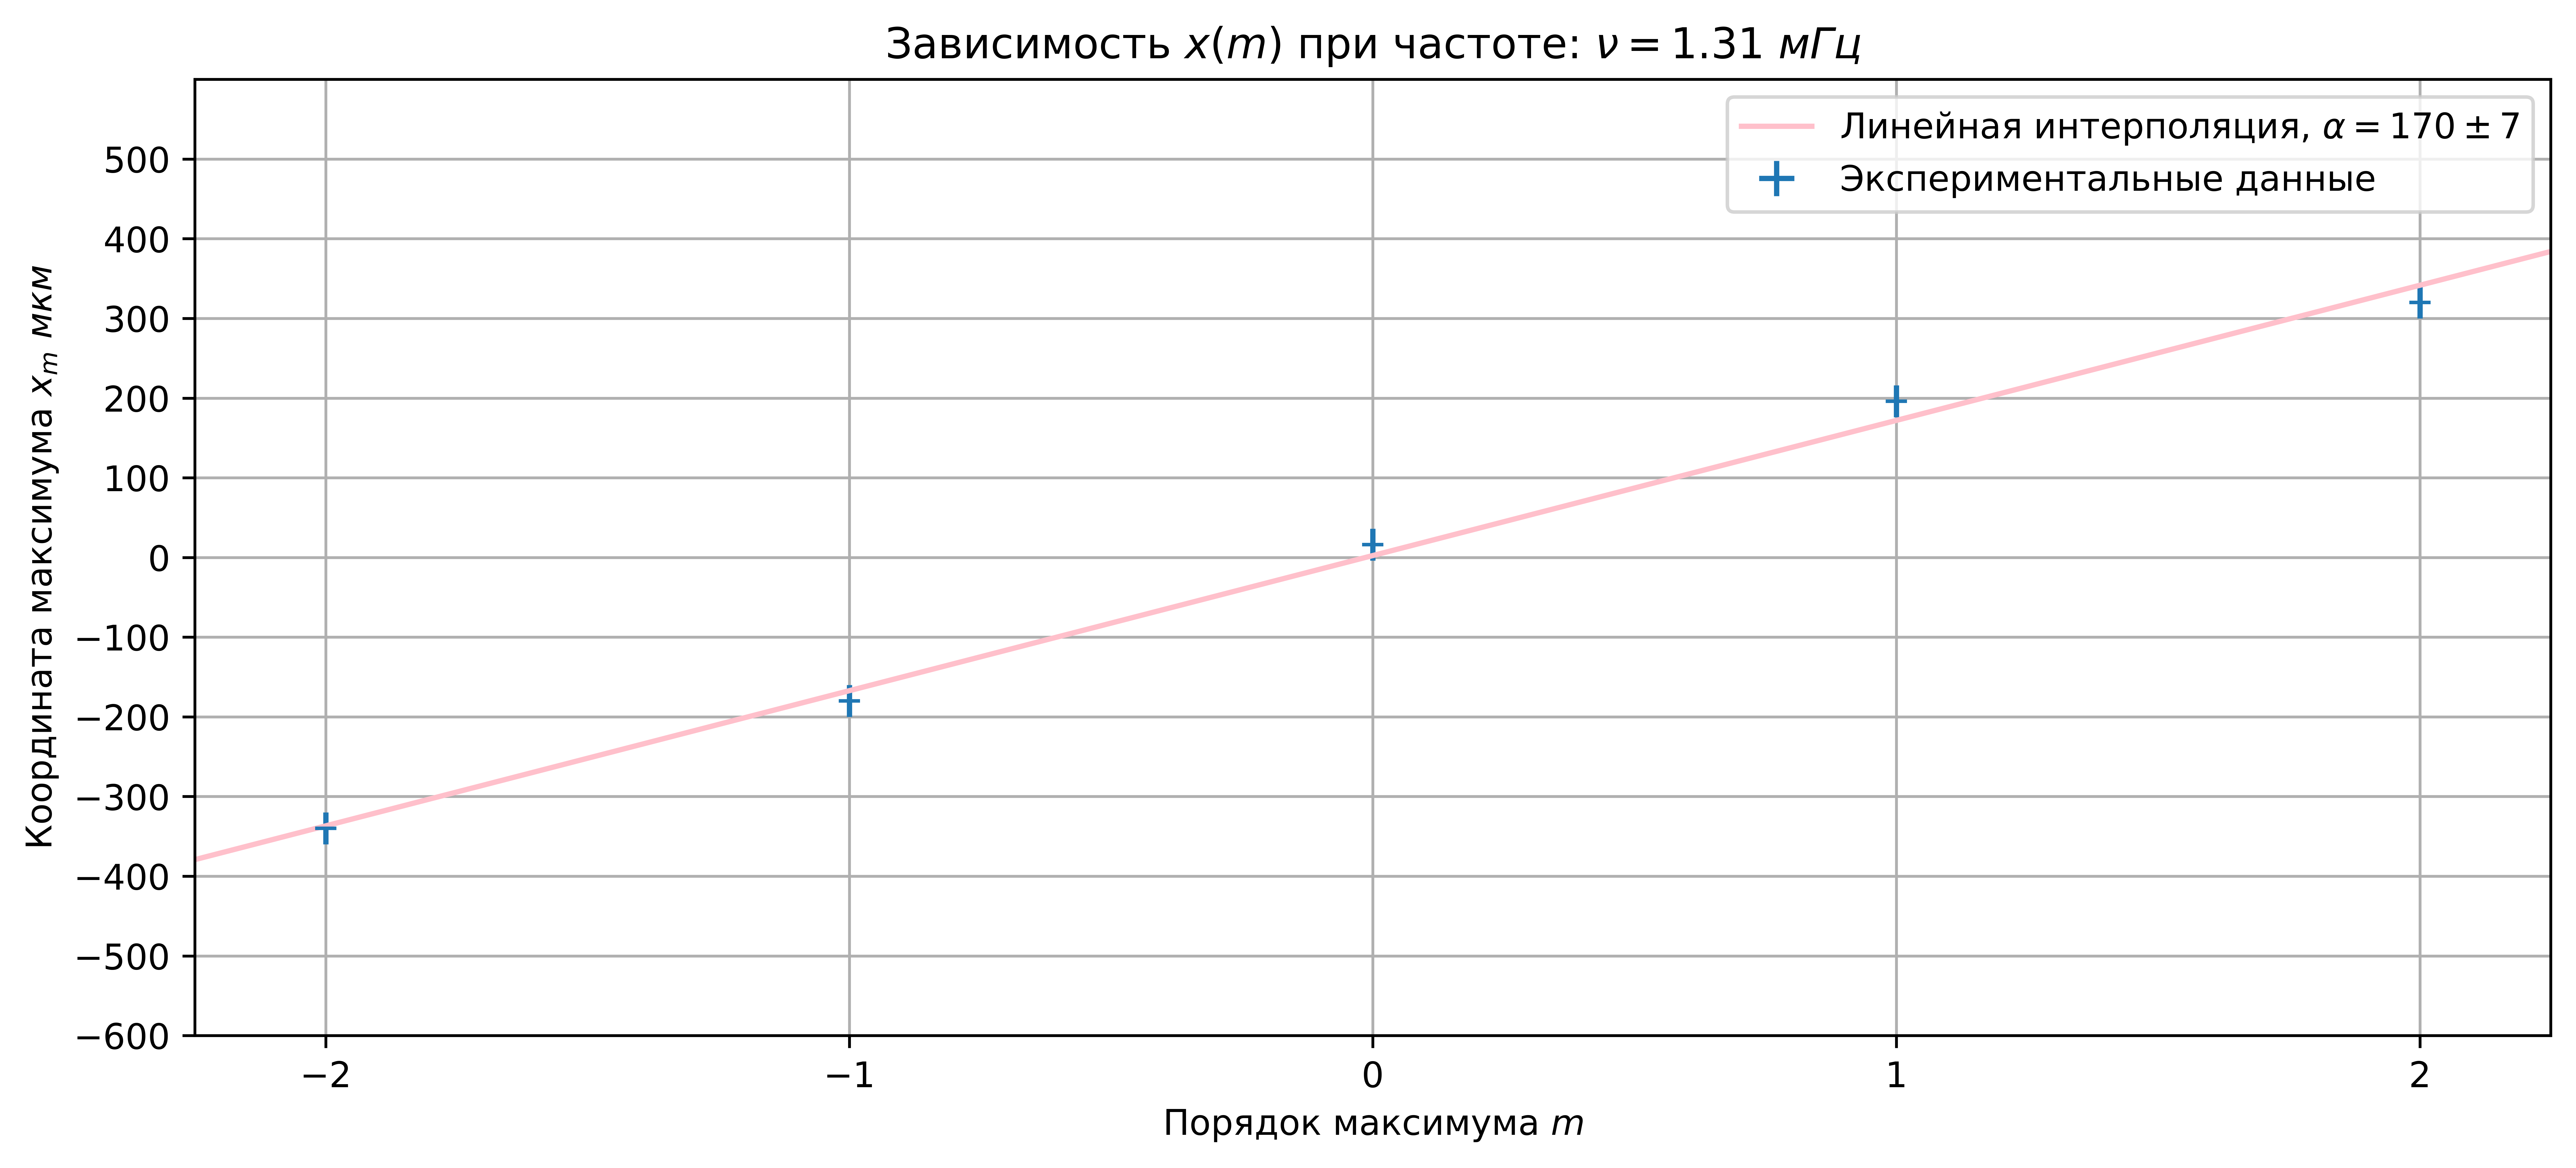

Длина звуковой волны = 0.0011320754716981135 +/- 5.773369588688644e-05
Скорость звука = 1483.0188679245286 +/- 75.63114161182125


In [ ]:
freq = 1.31
x = np.array([-85,-45,4,49,80])
m = np.array([-2,-1,0,1,2])
Lambda = countLambda(plotXbyM(freq,x,m))
speed = Lambda[0]*freq*np.power(10,6)
speedErr = Lambda[1]*freq*np.power(10,6)
print("Длина звуковой волны = {} +/- {}".format(Lambda[0]*1000,Lambda[1]*1000))
print("Скорость звука = {} +/- {}".format(speed,speedErr))

### Определение скорости ультразвука методом тёмного поля

Рассчёт длины волны производится по формуле:
$$
\Lambda = \frac{2 N C}{n-1}
$$
Где 
- $C$ - цена деления окулярной шкалы
- $N$ - количество делений шкалы окуляра
- $n$ - количество тёмных полос решетки(в выбранных пределах)

In [ ]:
def countLambda(N,n):
    C = 0.005 * np.power(0.1,3) #цена одного деления в метрах
    return 2*N*C/(n-1)

##### Эксперимент 1 - $\nu = 1.3 \ мГц$

<div>
<img src = "pics/130.jpg" width = '20%'>
</div>

In [ ]:
freq = np.array([1.66,1.49,1.3])
c = 1462.345
lamb = c/freq
lamb += (np.random.rand(3)-0.5)*0.02*min(lamb)
lamb

array([ 876.17533153,  986.49892822, 1118.6628932 ])

<ErrorbarContainer object of 3 artists>

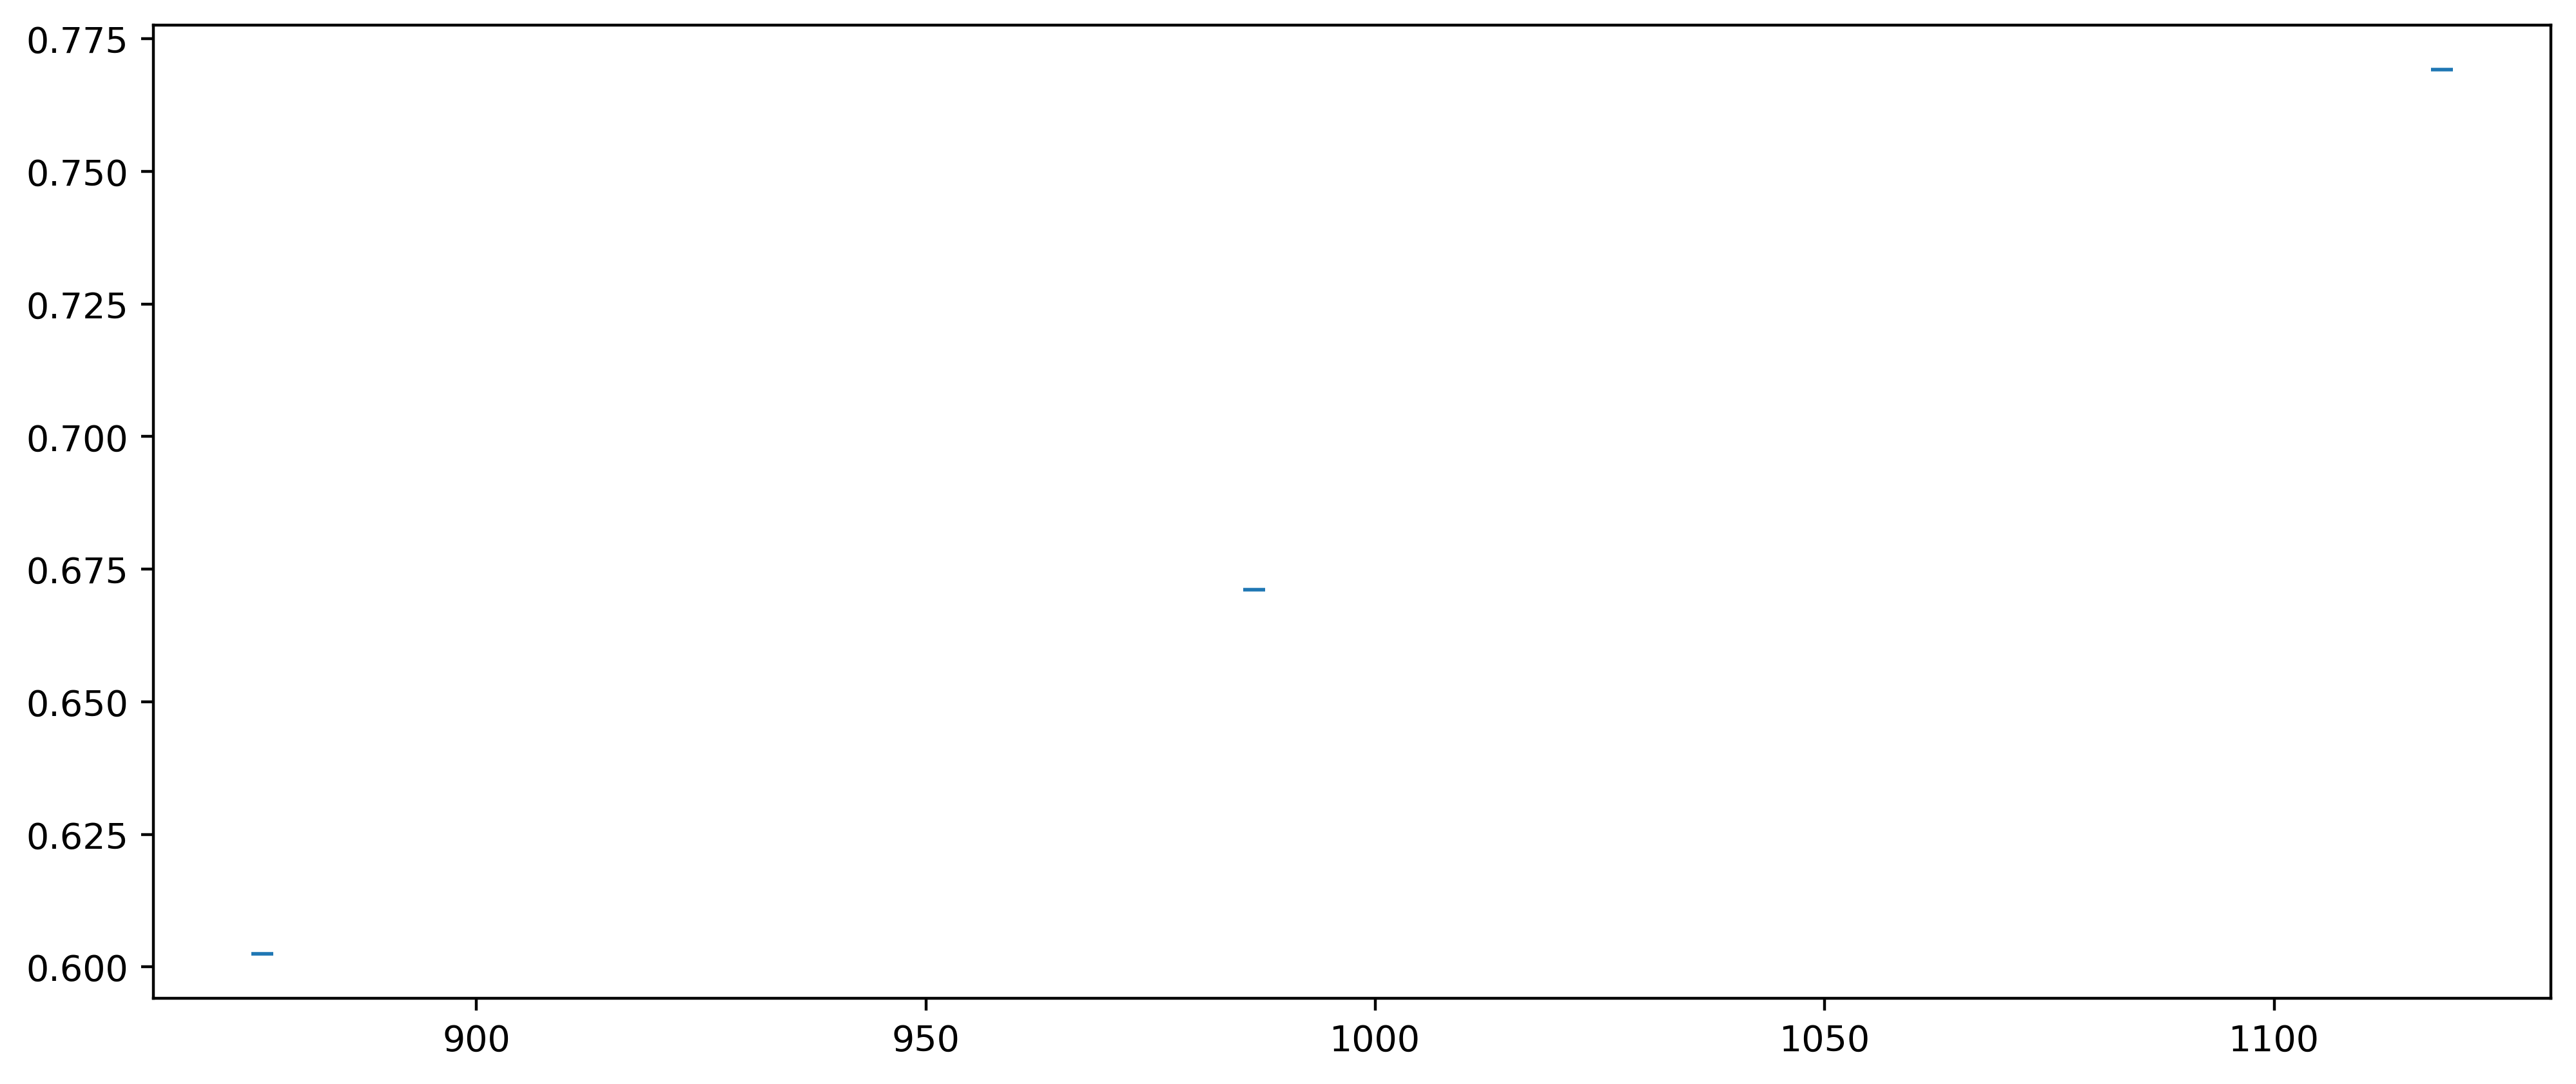

In [ ]:
fig, ax = plt.subplots(figsize = (12,5),dpi = 400)


plt.errorbar(lamb,1/freq,fmt = '_')